Link to competition: https://www.kaggle.com/c/fungi-challenge-fgvc-2018/overview

# Preparations

In [1]:
%reload_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
from fastai.vision import * 
# import json
from itertools import groupby

In [3]:
np.random.seed(1991)

How many training examples are processed in one iteration. If you face memory errors, decrease the batch size

In [4]:

batch_size = 64

Which image augmentation tecniques are used for the training data. Play with different options and see how they affect the results.

In [5]:
tfms = None
# tfms = get_transforms()
# tfms...?

Image size

In [7]:
image_size = 128

# Loading Data

In [6]:
data_path_str = "data"
train_path_str = "train"
test_path_str = "test"

In [8]:
data = ImageDataBunch.from_folder(
    path = data_path_str,
    train = train_path_str,
    test = test_path_str,
    size = image_size,
    ds_tfms = tfms,
    bs = batch_size,
    valid_pct = 0.2
).normalize(imagenet_stats)

In [9]:
data

ImageDataBunch;

Train: LabelList (71808 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus
Path: data;

Valid: LabelList (17952 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
16111_Leccinum_scabrum,14062_Fomes_fomentarius,14861_Gliophorus_psittacinus,11903_Coniophora_puteana,18776_Piptoporus_betulinus
Path: data;

Test: LabelList (9758 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: data

In [10]:
data.c

1394

# Visualize Data

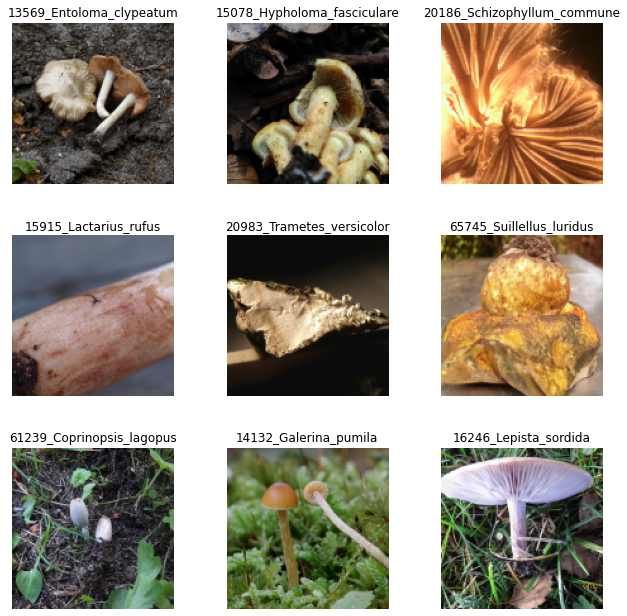

In [11]:
data.show_batch(3, figsize = (9, 9))

Analyzing dataset class frequences

In [12]:
class_labels = [data.y.classes[value] for value in data.y.items]

In [13]:
class_frequences = {key: len(list(group)) for key, group in groupby(class_labels)}

From the plots below we can see that over half of the classes have less than 50 images in them. Getting more images to the underpresented classes could improve the performance significantly.

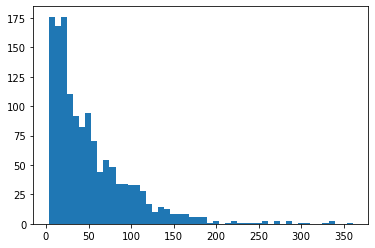

In [14]:
plt.hist(class_frequences.values(), bins = 50)
plt.show()

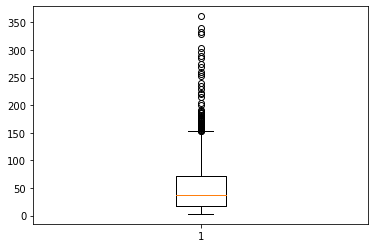

In [15]:
plt.boxplot(class_frequences.values())
plt.show()

In [95]:
class_frequences

{'67347_Gliophorus_irrigatus': 71,
 '13598_Entoloma_exile': 27,
 '60665_Diatrype_decorticata': 31,
 '14610_Helvella_elastica': 56,
 '64651_Hymenoscyphus_fraxineus': 17,
 '18475_Phleogena_faginea': 19,
 '17963_Panellus_mitis': 54,
 '19964_Russula_emetica': 39,
 '45206_Mycena_galopus var. nigra': 29,
 '15468_Inocybe_rimosa': 102,
 '11866_Coltricia_confluens': 20,
 '18925_Pluteus_umbrosus var. umbrosus ': 44,
 '20829_Tapinella_panuoides': 59,
 '63806_Antrodiella_faginea': 5,
 '12479_Cortinarius_largus': 163,
 '12785_Crepidotus_variabilis': 82,
 '18712_Phyllotopsis_nidulans': 16,
 '14069_Fuligo_leviderma': 6,
 '11575_Chamaemyces_fracidus': 5,
 '63641_Hygrocybe_miniata': 123,
 '44721_Mycetinis_querceus': 21,
 '61211_Coprinellus_xanthothrix': 40,
 '11286_Calyptella_gibbosa': 8,
 '20225_Scleroderma_verrucosum': 82,
 '15328_Inocybe_bongardii': 14,
 '18329_Phaeolus_schweinitzii': 138,
 '60939_Sarcomyxa_serotina': 59,
 '17150_Morchella_conica': 12,
 '61650_Tricholoma_frondosae': 21,
 '19919_Russ

In [153]:
?min

In [98]:
min(class_frequences, key = class_frequences.get)

'11748_Clitocybe_alexandri'

In [100]:
class_frequences['11748_Clitocybe_alexandri']

3

In [139]:
def get_class_number(class_name):
    return data.y.classes.index(class_name)

In [136]:
def get_class_indeces(class_number):
    return [index for index, value in enumerate(data.y.items) if value == class_number]

In [144]:
def show_images(class_name, images): 
    for image in images:
        Image.show(image, title=class_name)

In [143]:
def show_images_from_class(class_name):
    class_number = get_class_number(class_name)
    class_indeces = get_class_indeces(class_number)
    images = data.x[class_indeces]
    show_images(class_name, images)
    

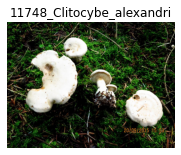

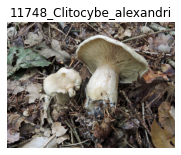

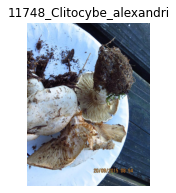

In [152]:
show_images_from_class('11748_Clitocybe_alexandri')